In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nps = pd.read_csv("nps.csv")

In [4]:
nps.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [5]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_date  3326 non-null   object
 1   user_id     3326 non-null   int64 
 2   score       3326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 78.1+ KB


In [6]:
nps["event_date"] = pd.to_datetime(nps["event_date"])

In [7]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_date  3326 non-null   datetime64[ns]
 1   user_id     3326 non-null   int64         
 2   score       3326 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 78.1 KB


TYPE OF CUSTOMERS 
1. Detractors
2. Passives
3. Promoters

Net Promoter Score (nps) = Promoters% - Detractors%

1. Add a column represnting year_month

In [8]:
year = nps["event_date"].dt.year
month = nps["event_date"].dt.month
yearmonth = year*100 + month

In [9]:
nps["yearmonth"]= yearmonth

In [10]:
nps.head()

,event_date,user_id,score,yearmonth
0,2020-01-01 19:00:51,290067447,8,202001
1,2020-01-02 17:34:43,223014806,10,202001
2,2020-01-02 19:11:55,187864388,10,202001
3,2020-01-02 19:27:00,318758952,8,202001
4,2020-01-02 21:42:19,189933311,0,202001


Customer Type Rating Scale 

Assuimung:
    
Detrector -> 0-6
Passive   -> 7-8 
Promoter  -> 9-10

2. Make a conlumn "Category" and mention the type of customers

In [11]:
def cat(score):
    if score in range (0,7): #[0,1,2,3,4,5,6]
        return "Detrector"
    elif score in [7,8]:
        return "Passive"
    else:
        return "Promoter"

In [12]:
nps["category"] = nps["score"].apply(cat)

In [13]:
nps.head()

,event_date,user_id,score,yearmonth,category
0,2020-01-01 19:00:51,290067447,8,202001,Passive
1,2020-01-02 17:34:43,223014806,10,202001,Promoter
2,2020-01-02 19:11:55,187864388,10,202001,Promoter
3,2020-01-02 19:27:00,318758952,8,202001,Passive
4,2020-01-02 21:42:19,189933311,0,202001,Detrector


In [14]:
nps.groupby(["yearmonth","category"]).size()

yearmonth  category 
202001     Detrector     31
           Passive       82
           Promoter     215
202002     Detrector     22
           Passive       90
           Promoter     161
202003     Detrector     33
           Passive       72
           Promoter     125
202004     Detrector     36
           Passive       87
           Promoter     178
202005     Detrector     33
           Passive       83
           Promoter     191
202006     Detrector     32
           Passive       80
           Promoter     215
202007     Detrector     48
           Passive       95
           Promoter     258
202008     Detrector     40
           Passive      103
           Promoter     256
202009     Detrector     18
           Passive       68
           Promoter     135
202010     Detrector     36
           Passive       83
           Promoter     177
202011     Detrector     18
           Passive       27
           Promoter      72
202012     Detrector     22
           Passive       42

In [15]:
# hierarchical_indexing 
# nps.loc[(row_label1,row_label2),column_label]
nps.groupby(["yearmonth","category"]).size().loc[(202001,"Passive")]

82

3. Representing the result in pivot table

In [16]:
df_nps = nps.pivot_table(index = "yearmonth", columns="category", aggfunc = "size")

In [17]:
df_nps

category,Detrector,Passive,Promoter
yearmonth,,,
202001,31,82,215
202002,22,90,161
202003,33,72,125
202004,36,87,178
202005,33,83,191
202006,32,80,215
202007,48,95,258
202008,40,103,256
202009,18,68,135


4. Calculate nps and add a column in the dataframe

In [18]:
df_nps["Total"]=df_nps.sum(axis=1)

In [19]:
df_nps

category,Detrector,Passive,Promoter,Total
yearmonth,,,,
202001,31,82,215,328
202002,22,90,161,273
202003,33,72,125,230
202004,36,87,178,301
202005,33,83,191,307
202006,32,80,215,327
202007,48,95,258,401
202008,40,103,256,399
202009,18,68,135,221


In [20]:
df_nps["NPS"]=(df_nps["Promoter"]-df_nps["Detrector"])*100/df_nps["Total"]

In [21]:
df_nps

category,Detrector,Passive,Promoter,Total,NPS
yearmonth,,,,,
202001,31,82,215,328,56.097561
202002,22,90,161,273,50.915751
202003,33,72,125,230,40.000000
202004,36,87,178,301,47.176080
202005,33,83,191,307,51.465798
202006,32,80,215,327,55.963303
202007,48,95,258,401,52.369077
202008,40,103,256,399,54.135338
202009,18,68,135,221,52.941176


5. Ploting this sequential data using line graph

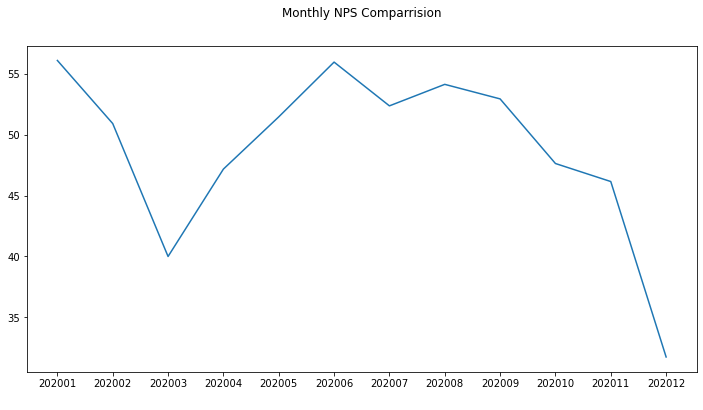

In [31]:
ax=df_nps.reset_index().plot(x="yearmonth",y="NPS",
                         title = "Monthly NPS Comparrision",
                         figsize=(12,6), legend=False)
plt.title("Monthly NPS Comparrision", y=1.07)
#plt.xticks(df_nps.index,df_nps.index)
plt.xticks(df_nps.index)
ax.set_xticklabels(df_nps.index)
plt.xlabel(" ")
plt.show()